# Univariate Analysis of Campus Placement Dataset

This notebook focuses on **univariate analysis**, where each feature is examined independently.

### Objectives:
- Understand the overall structure of the dataset
- Identify distributions, skewness, and outliers
- Establish baselines before comparative analysis
- Validate that the cleaned data behaves as expected

The dataset used here is the cleaned output generated in **Notebook 02**.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.style.use("default")


## Loading the Cleaned Dataset

We load the cleaned dataset to ensure that:
- All preprocessing steps are complete
- No raw or inconsistent values remain
- Analysis is reproducible and modular


In [39]:
df = pd.read_csv("../data/placement_cleaned.csv")

df.head()


,gender,10th_board,10th_marks,12th_board,12th_marks,stream,cgpa,internshipsy_n,trainingy_n,backlog_in_5th_sem,innovative_projecty_n,communication_level,technical_coursey_n,placementy_n,cgpa_normalized
0,Female,State Board,96.7,CBSE,70.2,Mechanical Engineering,7.37,0,1,0,0,3,1.0,0,73.7
1,Female,WBBSE,96.2,WBCHSE,90.6,Electronics and Communication Engineering,9.35,0,0,0,1,4,0.0,0,93.5
2,Male,State Board,97.5,CBSE,69.6,Information Technology,7.84,0,1,0,1,3,1.0,1,78.4
3,Female,CBSE,96.9,Other state Board,77.6,Computer Science in AIML,7.87,1,0,1,1,2,1.0,0,78.7
4,Female,ICSE,99.1,CBSE,62.8,Computer Science and Engineering,9.26,1,1,0,1,1,1.0,0,92.6


In [40]:
VISUALS_DIR = "../visuals"
os.makedirs(VISUALS_DIR, exist_ok=True)

def save_plot(filename):
    plt.savefig(os.path.join(VISUALS_DIR, filename),
                bbox_inches="tight",
                dpi=120)
    plt.show()


## Data Integrity Check

Before starting analysis, we verify:
- Column data types
- Presence of missing values
- Overall dataset size

This step ensures that all visualizations and statistics are reliable.


In [41]:
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 401 non-null    object 
 1   10th_board             401 non-null    object 
 2   10th_marks             401 non-null    float64
 3   12th_board             401 non-null    object 
 4   12th_marks             401 non-null    float64
 5   stream                 401 non-null    object 
 6   cgpa                   401 non-null    float64
 7   internshipsy_n         401 non-null    int64  
 8   trainingy_n            401 non-null    int64  
 9   backlog_in_5th_sem     401 non-null    int64  
 10  innovative_projecty_n  401 non-null    int64  
 11  communication_level    401 non-null    int64  
 12  technical_coursey_n    400 non-null    float64
 13  placementy_n           401 non-null    int64  
 14  cgpa_normalized        401 non-null    float64
dtypes: flo

gender                   0
10th_board               0
10th_marks               0
12th_board               0
12th_marks               0
stream                   0
cgpa                     0
internshipsy_n           0
trainingy_n              0
backlog_in_5th_sem       0
innovative_projecty_n    0
communication_level      0
technical_coursey_n      1
placementy_n             0
cgpa_normalized          0
dtype: int64

## Placement Outcome Distribution

The placement outcome is the **target variable** in this dataset.

Understanding its distribution helps:
- Establish a baseline placement rate
- Detect class imbalance
- Provide context for all later comparisons


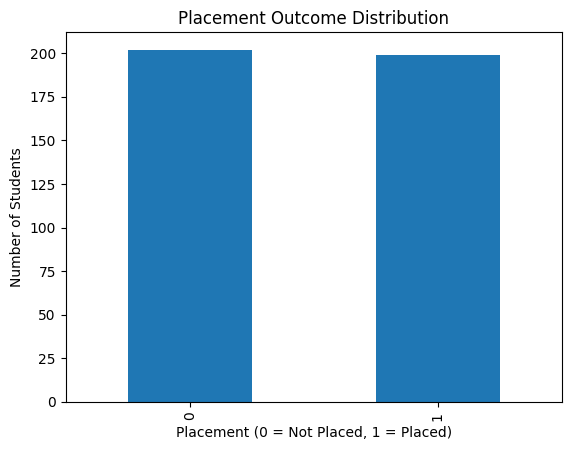

In [42]:
df["placementy_n"].value_counts().plot(kind="bar")
plt.title("Placement Outcome Distribution")
plt.xlabel("Placement (0 = Not Placed, 1 = Placed)")
plt.ylabel("Number of Students")

save_plot("placement_outcome_distribution.png")


## Gender Distribution

We examine the gender distribution to:
- Understand dataset representation
- Avoid biased or misleading conclusions later


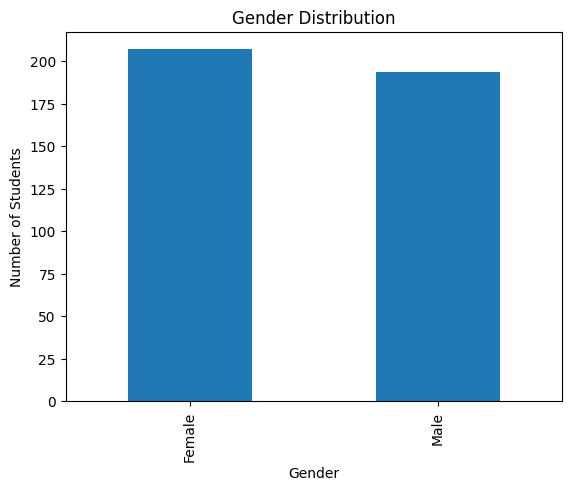

In [43]:
df["gender"].value_counts().plot(kind="bar")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Students")

save_plot("gender_distribution.png")


## Academic Stream Distribution

This shows how students are distributed across different academic streams.

Very small groups may lead to unstable comparisons in later analysis.


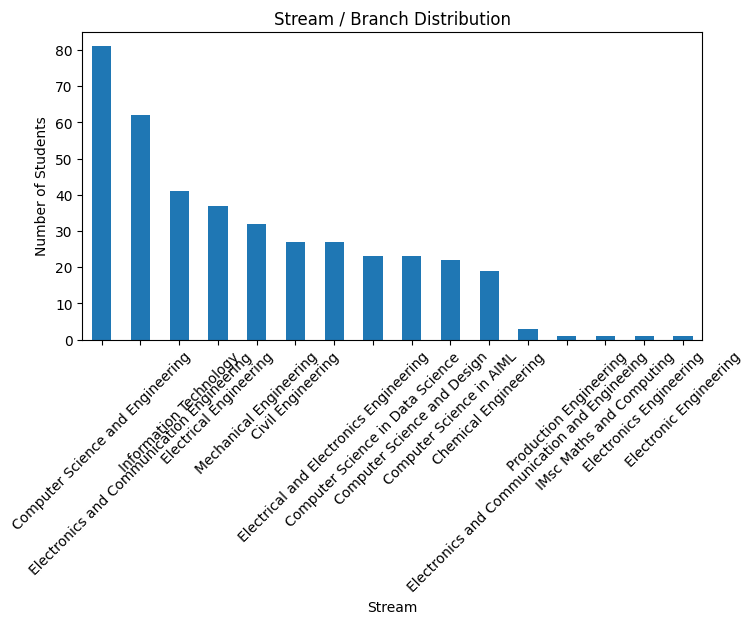

In [44]:
df["stream"].value_counts().plot(kind="bar", figsize=(8,4))
plt.title("Stream / Branch Distribution")
plt.xlabel("Stream")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)

save_plot("stream_distribution.png")


## Academic Performance Overview

We analyze academic performance at different stages:
- 10th grade marks
- 12th grade marks
- Engineering CGPA

This helps identify:
- Clustering patterns
- Extreme values
- Whether binning or normalization is needed later


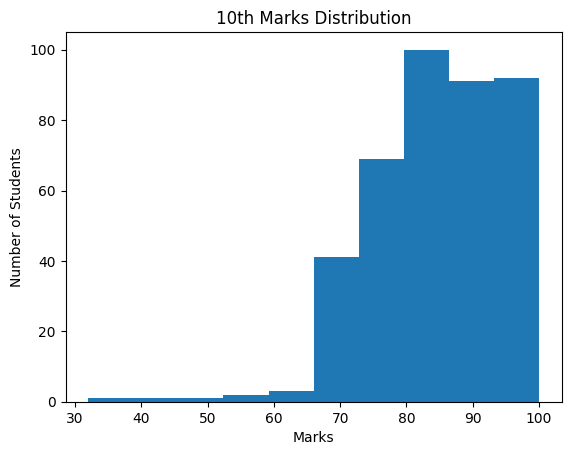

In [45]:
plt.hist(df["10th_marks"], bins=10)
plt.title("10th Marks Distribution")
plt.xlabel("Marks")
plt.ylabel("Number of Students")

save_plot("10th_marks_distribution.png")


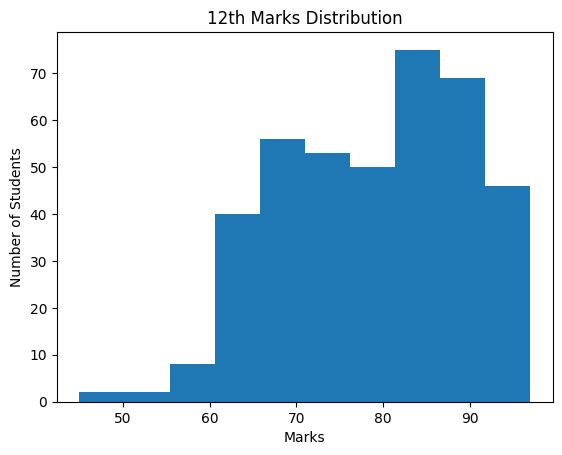

In [46]:
plt.hist(df["12th_marks"], bins=10)
plt.title("12th Marks Distribution")
plt.xlabel("Marks")
plt.ylabel("Number of Students")

save_plot("12th_marks_distribution.png")


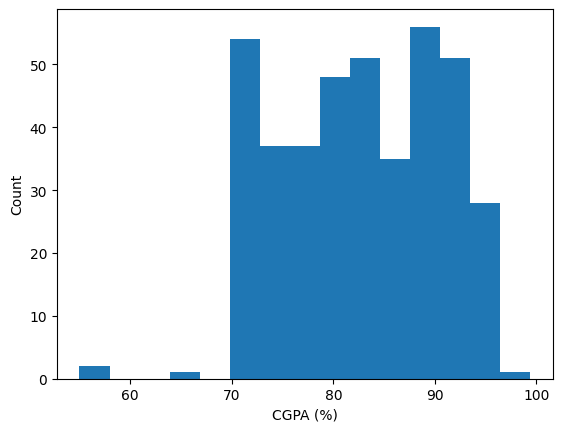

In [47]:
plt.hist(df["cgpa_normalized"], bins=15)
plt.xlabel("CGPA (%)")
plt.ylabel("Count")

save_plot("cgpa_distribution.png")


## Communication Skill Distribution

Communication level is a subjective rating.

We inspect its distribution to ensure:
- Reasonable spread across students
- No extreme skew that could distort analysis


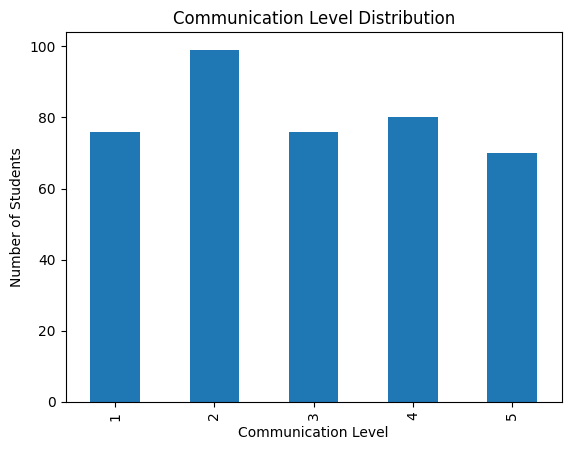

In [48]:
df["communication_level"].value_counts().sort_index().plot(kind="bar")
plt.title("Communication Level Distribution")
plt.xlabel("Communication Level")
plt.ylabel("Number of Students")

save_plot("communication_level_distribution.png")


## Participation in Key Resume-Building Activities

These binary features represent activities often believed to improve placement chances.

At this stage, we only measure **how common these activities are**, not their impact.


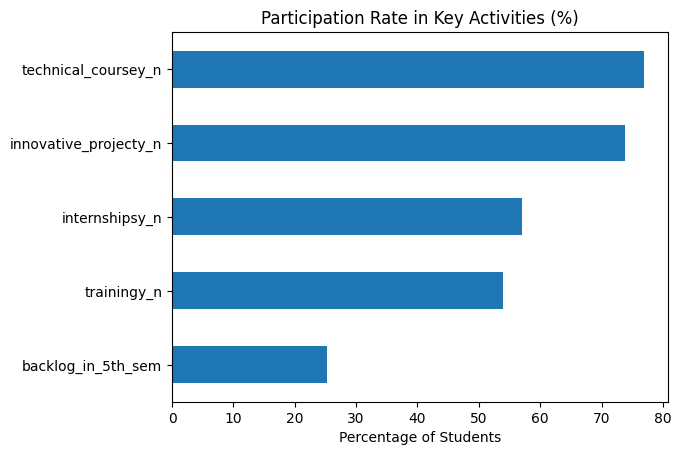

In [49]:
binary_features = [
    "internshipsy_n",
    "trainingy_n",
    "innovative_projecty_n",
    "technical_coursey_n",
    "backlog_in_5th_sem"
]

participation_rates = (df[binary_features].mean() * 100).sort_values()

participation_rates.plot(kind="barh")
plt.title("Participation Rate in Key Activities (%)")
plt.xlabel("Percentage of Students")

save_plot("binary_feature_participation_rates.png")


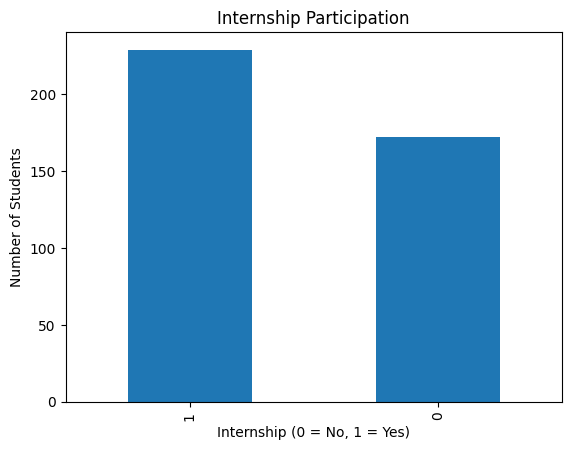

In [50]:
df["internshipsy_n"].value_counts().plot(kind="bar")
plt.title("Internship Participation")
plt.xlabel("Internship (0 = No, 1 = Yes)")
plt.ylabel("Number of Students")

save_plot("internship_participation.png")


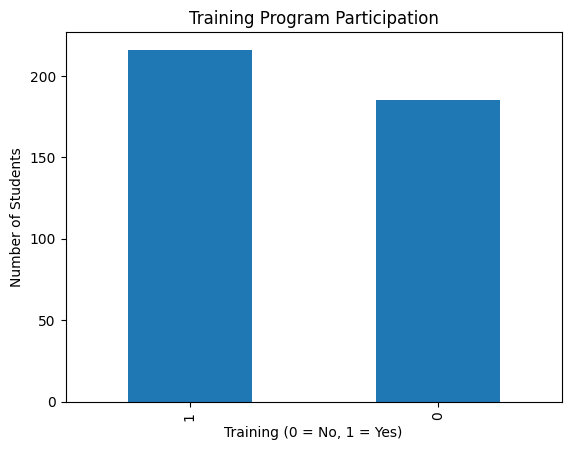

In [51]:
df["trainingy_n"].value_counts().plot(kind="bar")
plt.title("Training Program Participation")
plt.xlabel("Training (0 = No, 1 = Yes)")
plt.ylabel("Number of Students")

save_plot("training_participation.png")


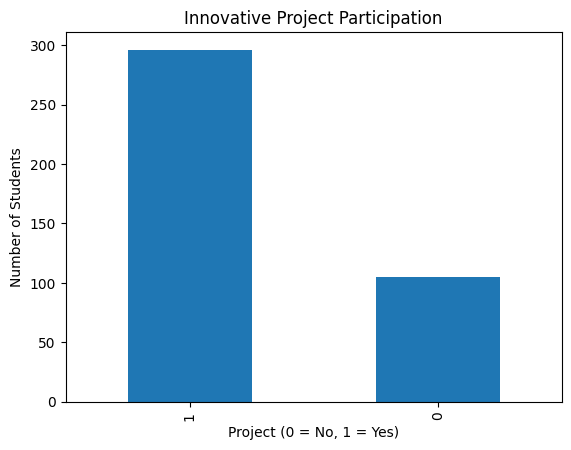

In [52]:
df["innovative_projecty_n"].value_counts().plot(kind="bar")
plt.title("Innovative Project Participation")
plt.xlabel("Project (0 = No, 1 = Yes)")
plt.ylabel("Number of Students")

save_plot("innovative_project_participation.png")


## Academic Backlog Status

Backlogs are an important academic indicator.

We examine how prevalent backlogs are before relating them to placement outcomes.


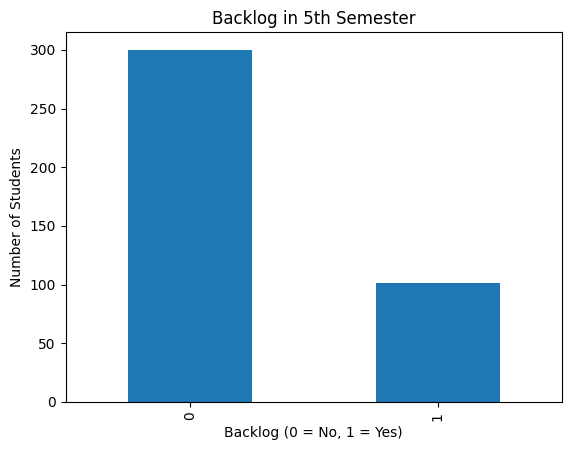

In [53]:
df["backlog_in_5th_sem"].value_counts().plot(kind="bar")
plt.title("Backlog in 5th Semester")
plt.xlabel("Backlog (0 = No, 1 = Yes)")
plt.ylabel("Number of Students")

save_plot("backlog_distribution.png")


## Summary of Univariate Analysis

Key observations:
- Placement outcomes are moderately balanced
- Internship and training participation are not universal
- CGPA and school marks show clustering rather than uniform spread
- Communication skills vary meaningfully across students
- A notable number of students have academic backlogs

These insights inform the comparative (bivariate and multivariate) analysis
performed in the next notebook.
